In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam


In [4]:
X,y = make_moons(100,noise=0.25,random_state=42)

In [5]:
X

array([[ 1.67746885, -0.58182293],
       [ 0.13745149,  0.63475669],
       [ 0.76836917, -0.30940669],
       [-1.19137866,  0.22565763],
       [-0.58182043,  0.03413363],
       [-0.56391227,  1.02973965],
       [ 0.27407116,  0.56610994],
       [ 1.42707636, -0.45874816],
       [ 0.91836231,  0.78214112],
       [ 0.80507453, -0.21097409],
       [ 0.36714988,  0.67302321],
       [-0.30774278,  0.91011311],
       [ 1.56235903, -0.75165184],
       [-0.71390452,  0.96112853],
       [ 2.05626438,  0.52627159],
       [ 1.37302499,  0.45958785],
       [ 1.16928784, -0.27122152],
       [ 1.00701939, -0.56622326],
       [ 0.34774329,  0.63847067],
       [-0.16412302,  0.86198951],
       [-0.14256648,  0.09494725],
       [ 1.94246677, -0.21216955],
       [ 0.11645728,  0.66754806],
       [-1.11854511,  0.30722293],
       [ 0.32714727,  0.29744743],
       [ 0.29805021,  1.04889334],
       [-1.00460326,  0.41708803],
       [ 2.05688986, -0.05578786],
       [ 0.67240353,

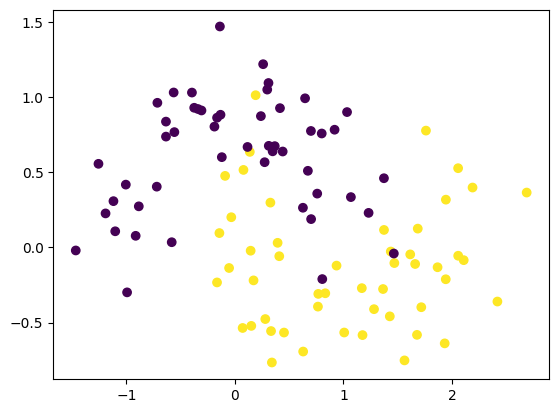

In [6]:
plt.scatter(x=X[:,0],y=X[:,1],c=y)
plt.show()

In [8]:
model1 = Sequential()
model1.add(Dense(128,input_dim=2,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history1 = model1.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

**Case of overfitting**

9600/9600 [==============================] - 14s 1ms/step


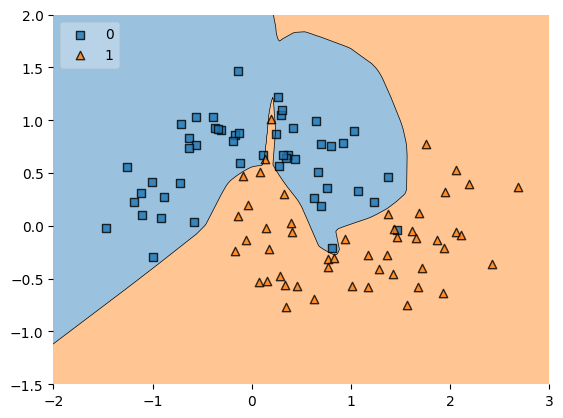

In [10]:
plot_decision_regions(X,y.astype(int),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

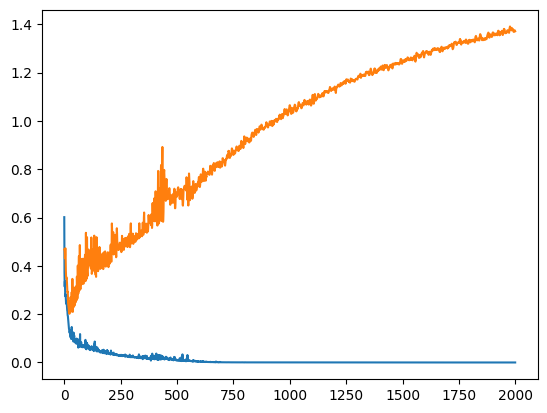

In [12]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [13]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=keras.regularizers.l2(0.03)))
model2.add(Dense(128,activation='relu',kernel_regularizer=keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history2 = model2.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 14s 1ms/step


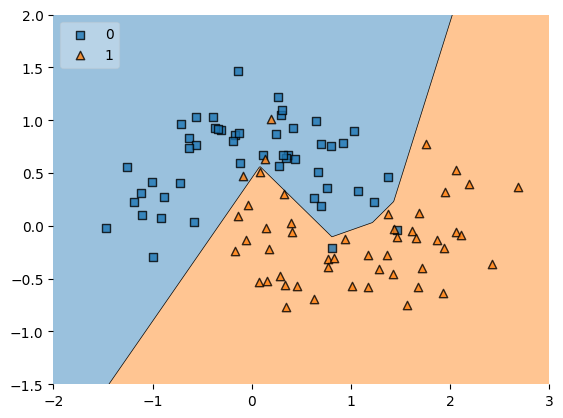

In [15]:
plot_decision_regions(X,y.astype('int'),clf=model2,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

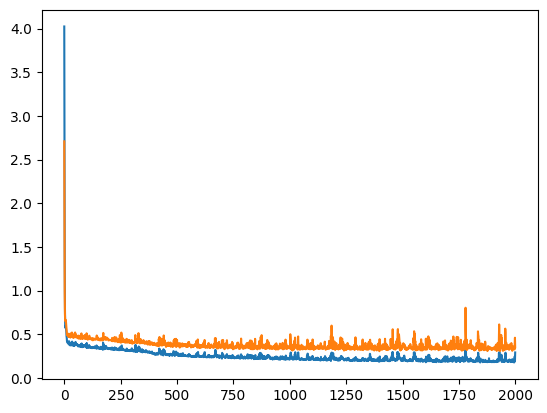

In [16]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [17]:
model1_weights_layer1 = model1.get_weights()[0].reshape(256) #1st layers's weight
model2_weights_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

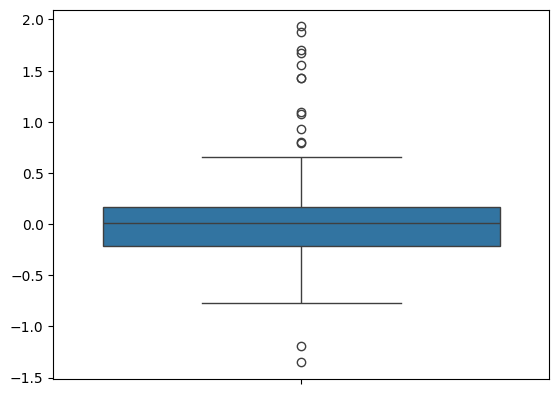

In [18]:
sns.boxplot(model1_weights_layer1)

<Axes: >

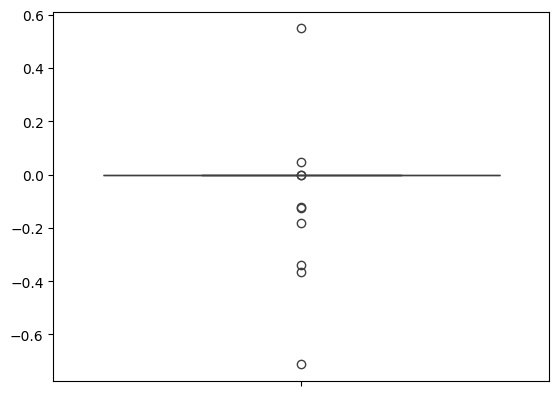

In [19]:
sns.boxplot(model2_weights_layer1)  # after regularization weight decay occurs

In [20]:
model1_weights_layer1.max()

1.9327683

In [21]:
model2_weights_layer1.max()

0.548509

In [22]:
model1_weights_layer1.min()

-1.3518128

In [23]:
model2_weights_layer1.min()

-0.71199554

<ipython-input-30-01fc1ba373ae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weights_layer1)
<ipython-input-30-01fc1ba373ae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weights_layer1)


<Axes: ylabel='Density'>

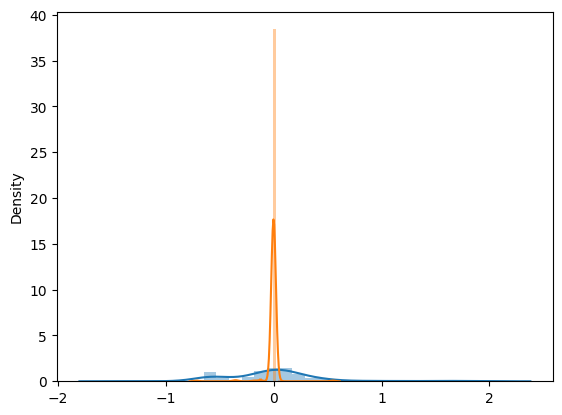

In [30]:
sns.distplot(model1_weights_layer1)
sns.distplot(model2_weights_layer1)

In [35]:
model3 = Sequential()

model3.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=keras.regularizers.l1(0.001)))
model3.add(Dense(128,activation='relu',kernel_regularizer=keras.regularizers.l1(0.001)))
model3.add(Dense(1,activation='sigmoid'))

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               384       
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
adam = Adam(learning_rate=0.01)
model3.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history3 = model3.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 18s 2ms/step


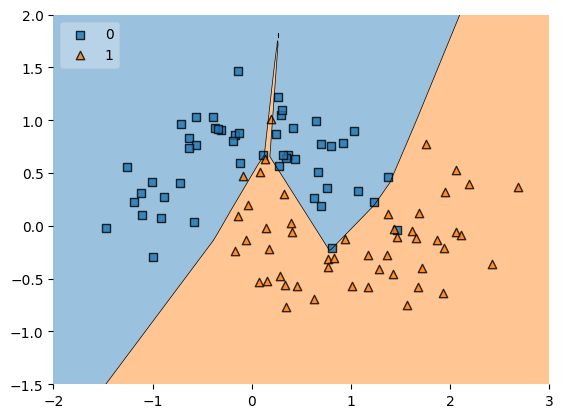

In [37]:
plot_decision_regions(X,y.astype('int'),clf=model3,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

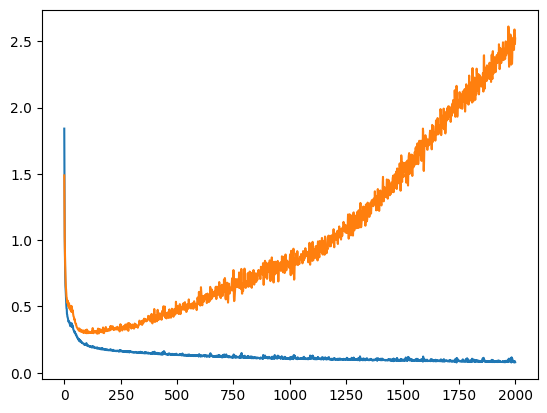

In [38]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

In [39]:
model3_weight_layer1 = model3.get_weights()[0].reshape(256)

In [40]:
model3_weight_layer1.max()

1.4169242

In [41]:
model3_weight_layer1.min()

-2.9481816